# Broadband Outage Detection

India is seeing an explosion of new competitors in the Broadband space. ABC Broadband' is
a company that is now seeing a lot of customer churn due to customer dissatisfaction because
of broadband outages.

The company has now curated a dataset, where it tracks several variables that it believes
impact the `outage_duration`. They have tracked three different outage durations, `0` for no
outage, `1` for short outages that last anywhere between a few minutes and a maximum of 2
hours, and `2` for long outages that can last from 2 hours to sometimes even a couple of days.
You will now have to use these metrics that the company has tracked to create a machine
learning model that will be able to predict the `outage_duration` so that the company can
better handle outages and improve customer satisfaction and therefore reduce customer
Churn.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [150]:
train_data=pd.read_csv(r'C:\Users\USER\Desktop\ML project\Data\train_data.csv')
test=pd.read_csv(r'C:\Users\USER\Desktop\ML project\Data\test.csv')
server_data=pd.read_csv(r'C:\Users\USER\Desktop\ML project\Data\server_data.csv')
report_data=pd.read_csv(r'C:\Users\USER\Desktop\ML project\Data\report_data.csv')
outage_data=pd.read_csv(r'C:\Users\USER\Desktop\ML project\Data\outage_data.csv')
broadband_data=pd.read_csv(r'C:\Users\USER\Desktop\ML project\Data\broadband_data.csv')

In [151]:
train_data.head()

,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0
2,9519,area_931,1
3,10202,area_700,1
4,4555,area_600,2


In [152]:
test.head()

,id,area_code
0,3340,area_344
1,14067,area_933
2,1134,area_16
3,27,area_793
4,9793,area_344


In [153]:
broadband_data.head()

,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8


In [154]:
outage_data.head()

,id,outage_type
0,6597,outage_type_2
1,8011,outage_type_2
2,2597,outage_type_2
3,5022,outage_type_1
4,6852,outage_type_1


In [155]:
report_data.head()

,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1


In [156]:
train_data.nunique()

id                 5904
area_code           876
outage_duration       3
dtype: int64

In [157]:
broadband_data['broadband_type'].value_counts()

broadband_type_8     10268
broadband_type_2      8918
broadband_type_6       582
broadband_type_7       498
broadband_type_4       330
broadband_type_9       190
broadband_type_3       145
broadband_type_10       73
broadband_type_1        58
broadband_type_5        14
Name: broadband_type, dtype: int64

In [158]:
broadband_data

,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8
...,...,...
21071,3761,broadband_type_8
21072,8720,broadband_type_8
21073,6488,broadband_type_8
21074,878,broadband_type_8


In [159]:
dataset=pd.merge(train_data,broadband_data,how='left',on='id')

In [160]:
dataset

,id,area_code,outage_duration,broadband_type
0,13366,area_415,1,broadband_type_2
1,6783,area_474,0,broadband_type_2
2,9519,area_931,1,broadband_type_8
3,10202,area_700,1,broadband_type_8
4,4555,area_600,2,broadband_type_8
...,...,...,...,...
6749,1910,area_403,1,broadband_type_2
6750,10475,area_821,0,broadband_type_8
6751,10675,area_798,2,broadband_type_8
6752,14714,area_210,0,broadband_type_2


In [161]:
dataset=pd.merge(dataset,server_data,how='left',on='id')

In [162]:
dataset

,id,area_code,outage_duration,broadband_type,transit_server_type
0,13366,area_415,1,broadband_type_2,transit_server_type_35
1,6783,area_474,0,broadband_type_2,transit_server_type_35
2,6783,area_474,0,broadband_type_2,transit_server_type_34
3,9519,area_931,1,broadband_type_8,transit_server_type_15
4,10202,area_700,1,broadband_type_8,transit_server_type_11
...,...,...,...,...,...
12377,10475,area_821,0,broadband_type_8,transit_server_type_11
12378,10675,area_798,2,broadband_type_8,transit_server_type_15
12379,14714,area_210,0,broadband_type_2,transit_server_type_35
12380,14714,area_210,0,broadband_type_2,transit_server_type_34


In [163]:
dataset=pd.merge(dataset,outage_data,how='left',on='id')

In [164]:
dataset

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type
0,13366,area_415,1,broadband_type_2,transit_server_type_35,outage_type_4
1,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2
2,6783,area_474,0,broadband_type_2,transit_server_type_34,outage_type_2
3,9519,area_931,1,broadband_type_8,transit_server_type_15,outage_type_2
4,10202,area_700,1,broadband_type_8,transit_server_type_11,outage_type_1
...,...,...,...,...,...,...
12377,10475,area_821,0,broadband_type_8,transit_server_type_11,outage_type_1
12378,10675,area_798,2,broadband_type_8,transit_server_type_15,outage_type_2
12379,14714,area_210,0,broadband_type_2,transit_server_type_35,outage_type_2
12380,14714,area_210,0,broadband_type_2,transit_server_type_34,outage_type_2


In [165]:
dataset=pd.merge(dataset,report_data,how='left',on='id')

In [166]:
dataset

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type,log_report_type,volume
0,13366,area_415,1,broadband_type_2,transit_server_type_35,outage_type_4,log_report_type_312,1
1,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,2
2,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_233,1
3,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_232,1
4,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_315,2
...,...,...,...,...,...,...,...,...
48968,14714,area_210,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,3
48969,14714,area_210,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_232,2
48970,14714,area_210,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_312,3
48971,6253,area_1007,0,broadband_type_8,transit_server_type_15,outage_type_2,log_report_type_201,6


In [167]:
dataset.isnull().any()

id                     False
area_code              False
outage_duration        False
broadband_type         False
transit_server_type    False
outage_type            False
log_report_type        False
volume                 False
dtype: bool

In [168]:
dataset['broadband_type'].groupby(dataset['id']).value_counts()

id     broadband_type  
1      broadband_type_6     6
       broadband_type_8     6
5      broadband_type_2     4
6      broadband_type_2     2
13     broadband_type_2     4
                           ..
18538  broadband_type_8     4
18542  broadband_type_2     4
18543  broadband_type_8     1
18548  broadband_type_2    12
18550  broadband_type_8     2
Name: broadband_type, Length: 6754, dtype: int64

# Count plot for Broadband type

<AxesSubplot:xlabel='count', ylabel='broadband_type'>

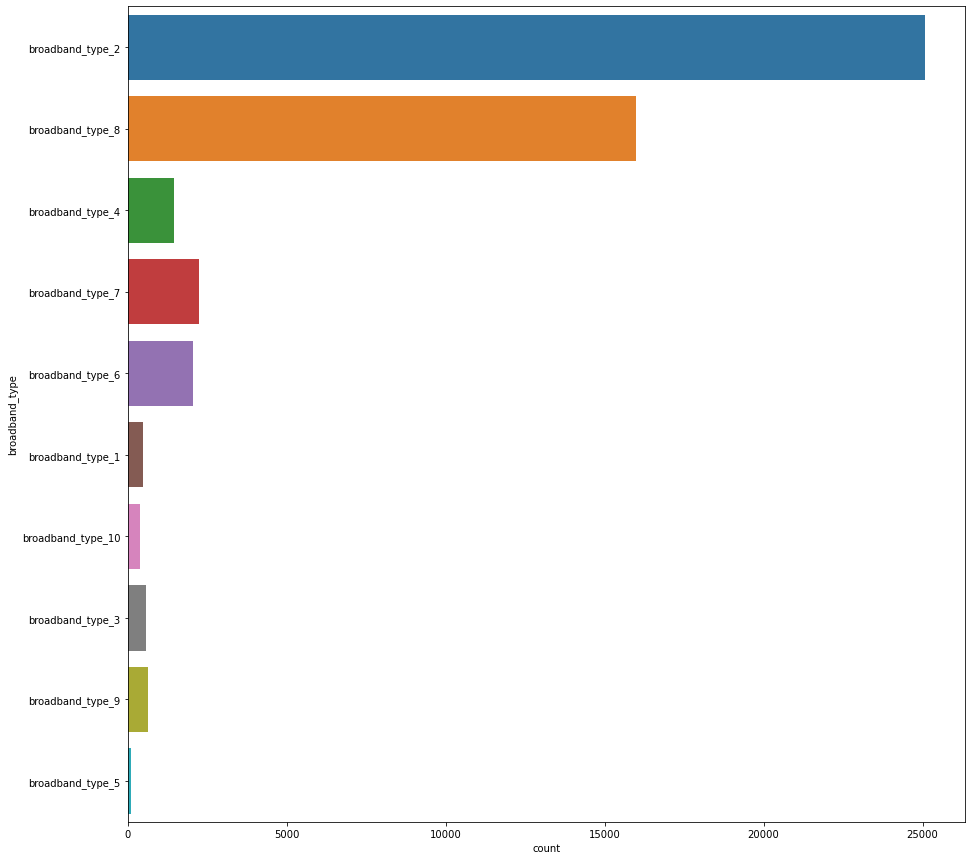

In [169]:
plt.figure(figsize=(15,15))
sns.countplot(y=dataset['broadband_type'])

## Observations
Most of the outage reports are from broadband type :'ADSL2' followed by 'ADSL1'

# Transit server type

<AxesSubplot:xlabel='count', ylabel='transit_server_type'>

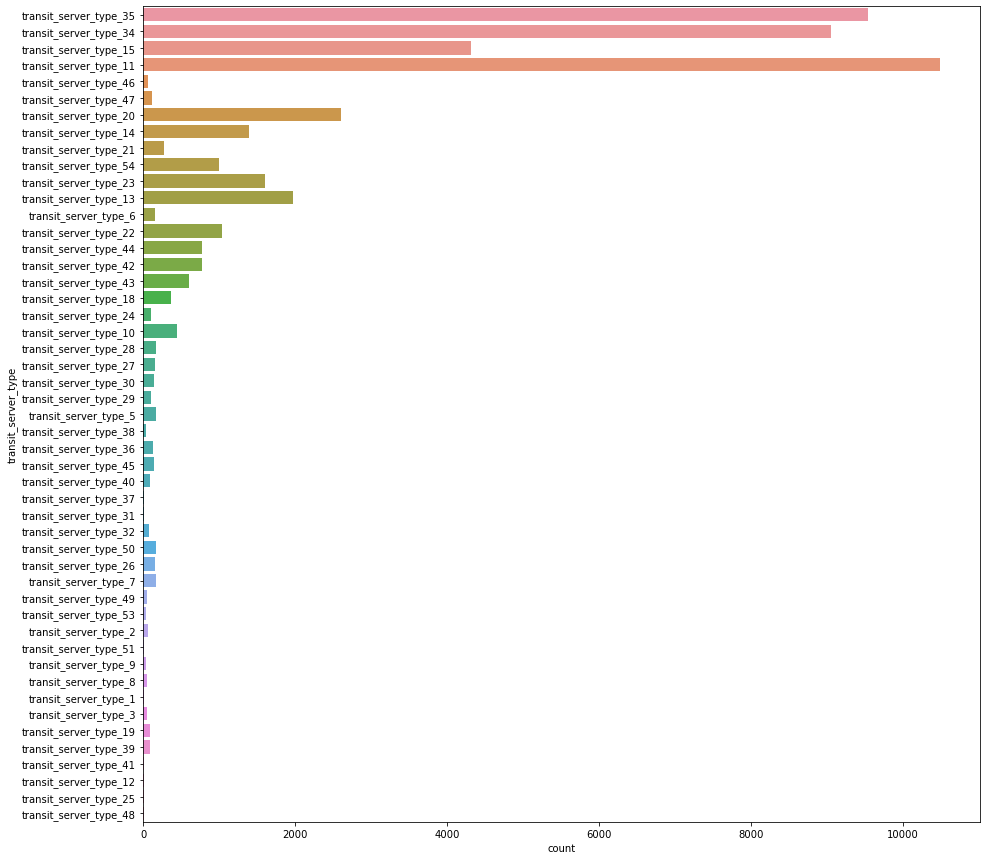

In [170]:
plt.figure(figsize=(15,15))
sns.countplot(y=dataset['transit_server_type'])

## Observations
Most of the outage reports are from transit server type 11,34 and 35

In [171]:
#plt.pie(dataset['outage_duration'].value_counts(),labels=[0,1,2])
#plt.show()

## Observations
Almost 13% of the outage reports are long durations and 26% are of shorter duration

Question 1: Which area has most long duration outages

In [172]:
dataset[dataset['outage_duration']==2]['area_code'].value_counts().head(5)

area_13     490
area_734    338
area_821    313
area_32     300
area_984    256
Name: area_code, dtype: int64

Answer1: area_13 has the most long outage reports

In [173]:
dataset[(dataset['area_code']=='area_13') & (dataset['outage_duration']==2)]

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type,log_report_type,volume
16577,2977,area_13,2,broadband_type_10,transit_server_type_11,outage_type_1,log_report_type_273,2
16578,2977,area_13,2,broadband_type_10,transit_server_type_11,outage_type_1,log_report_type_222,4
16579,2977,area_13,2,broadband_type_10,transit_server_type_11,outage_type_1,log_report_type_306,3
16580,2977,area_13,2,broadband_type_10,transit_server_type_11,outage_type_1,log_report_type_118,1
16581,2977,area_13,2,broadband_type_10,transit_server_type_11,outage_type_1,log_report_type_87,4
...,...,...,...,...,...,...,...,...
18051,406,area_13,2,broadband_type_4,transit_server_type_14,outage_type_1,log_report_type_305,1
18052,406,area_13,2,broadband_type_4,transit_server_type_14,outage_type_1,log_report_type_303,2
18053,406,area_13,2,broadband_type_4,transit_server_type_14,outage_type_1,log_report_type_134,1
18054,406,area_13,2,broadband_type_4,transit_server_type_14,outage_type_1,log_report_type_345,1


Question2: which broadband type has most long and short duration outages

In [174]:
train_broad=pd.merge(train_data,broadband_data)

In [175]:
train_broad[train_broad['outage_duration']==2]['broadband_type'].value_counts()

broadband_type_8     544
broadband_type_2      82
broadband_type_6      26
broadband_type_4      17
broadband_type_1      10
broadband_type_7       9
broadband_type_3       4
broadband_type_9       4
broadband_type_5       3
broadband_type_10      1
Name: broadband_type, dtype: int64

In [176]:
train_broad[train_broad['outage_duration']==1]['broadband_type'].value_counts()

broadband_type_8     1019
broadband_type_2      527
broadband_type_6      112
broadband_type_7       77
broadband_type_4       41
broadband_type_9       23
broadband_type_3       23
broadband_type_1       10
broadband_type_10       8
Name: broadband_type, dtype: int64

Answer2: broadband type 8 and 2 are giving more long and short outage reports

Question3: For respective broadband find give count of respective outage types

In [177]:
train_broad_outage=pd.merge(train_broad,outage_data)

In [178]:
broadband_name={
'broadband_type_8' : 'ADSL 1',
'broadband_type_2' : 'ADSL 2',
'broadband_type_6' : 'ADSL 2+',
'broadband_type_7' : 'Cable',
'broadband_type_4' : 'Fiber 1',
'broadband_type_9' : 'BPL',
'broadband_type_3' : 'Fiber 2',
'broadband_type_10' : 'Fiber High Speed',
'broadband_type_1' : 'Fiber Ultra',
'broadband_type_5' : 'Fiber Ultra Max'
    }

In [179]:
train_broad_outage['broadband_name']=train_broad_outage['broadband_type'].replace(broadband_name)

In [180]:
train_broad_outage

,id,area_code,outage_duration,broadband_type,outage_type,broadband_name
0,13366,area_415,1,broadband_type_2,outage_type_4,ADSL 2
1,6783,area_474,0,broadband_type_2,outage_type_2,ADSL 2
2,9519,area_931,1,broadband_type_8,outage_type_2,ADSL 1
3,10202,area_700,1,broadband_type_8,outage_type_1,ADSL 1
4,4555,area_600,2,broadband_type_8,outage_type_2,ADSL 1
...,...,...,...,...,...,...
6749,1910,area_403,1,broadband_type_2,outage_type_2,ADSL 2
6750,10475,area_821,0,broadband_type_8,outage_type_1,ADSL 1
6751,10675,area_798,2,broadband_type_8,outage_type_2,ADSL 1
6752,14714,area_210,0,broadband_type_2,outage_type_2,ADSL 2


In [181]:
pd.crosstab(train_broad_outage['broadband_name'],train_broad_outage['outage_type'],margins=True)

outage_type,outage_type_1,outage_type_2,outage_type_3,outage_type_4,outage_type_5,All
broadband_name,,,,,,
ADSL 1,2103,1104,1,38,0,3246
ADSL 2,804,1815,4,226,2,2851
ADSL 2+,201,0,0,0,0,201
BPL,34,13,0,2,12,61
Cable,84,57,0,38,0,179
Fiber 1,79,31,0,4,0,114
Fiber 2,24,3,0,11,6,44
Fiber High Speed,28,0,0,0,0,28
Fiber Ultra,24,3,0,0,0,27


<AxesSubplot:xlabel='broadband_name'>

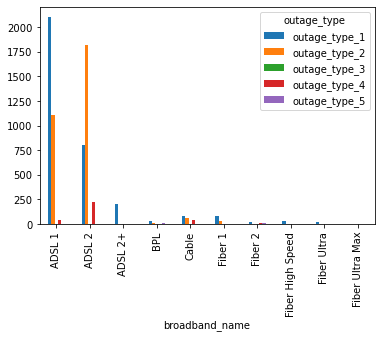

In [182]:
pd.crosstab(train_broad_outage['broadband_name'],train_broad_outage['outage_type']).plot(kind='bar')

In [183]:
pd.crosstab(train_broad_outage['outage_duration'],train_broad_outage['outage_type'],margins=True)

outage_type,outage_type_1,outage_type_2,outage_type_3,outage_type_4,outage_type_5,All
outage_duration,,,,,,
0,1705,2222,5,272,10,4214
1,1179,604,0,47,10,1840
2,500,200,0,0,0,700
All,3384,3026,5,319,20,6754


## Observations

In [184]:
train_server=pd.merge(train_data,server_data)

In [185]:
train_server

,id,area_code,outage_duration,transit_server_type
0,13366,area_415,1,transit_server_type_35
1,6783,area_474,0,transit_server_type_35
2,6783,area_474,0,transit_server_type_34
3,9519,area_931,1,transit_server_type_15
4,10202,area_700,1,transit_server_type_11
...,...,...,...,...
9963,10475,area_821,0,transit_server_type_11
9964,10675,area_798,2,transit_server_type_15
9965,14714,area_210,0,transit_server_type_35
9966,14714,area_210,0,transit_server_type_34


In [186]:
train_server[train_server['outage_duration']==2]['transit_server_type'].value_counts().head()

transit_server_type_15    414
transit_server_type_11    324
transit_server_type_54     39
transit_server_type_42     34
transit_server_type_44     34
Name: transit_server_type, dtype: int64

In [187]:
train_server[train_server['outage_duration']==1]['transit_server_type'].value_counts().head()

transit_server_type_11    798
transit_server_type_15    359
transit_server_type_35    320
transit_server_type_34    309
transit_server_type_13    112
Name: transit_server_type, dtype: int64

In [188]:
train_server[(train_server['outage_duration']==1) | (train_server['outage_duration']==2)]['transit_server_type'].value_counts().head()

transit_server_type_11    1122
transit_server_type_15     773
transit_server_type_35     320
transit_server_type_34     309
transit_server_type_13     138
Name: transit_server_type, dtype: int64

In [189]:
pd.crosstab(train_server['transit_server_type'],train_server['outage_duration'],margins=True)

outage_duration,0,1,2,All
transit_server_type,,,,
transit_server_type_1,1,0,0,1
transit_server_type_10,17,23,4,44
transit_server_type_11,1351,798,324,2473
transit_server_type_12,1,1,0,2
transit_server_type_13,63,112,26,201
transit_server_type_14,56,41,17,114
transit_server_type_15,597,359,414,1370
transit_server_type_18,19,8,1,28
transit_server_type_19,0,0,3,3


In [190]:
train_report=pd.merge(train_data,report_data)

In [191]:
train_report.head()

,id,area_code,outage_duration,log_report_type,volume
0,13366,area_415,1,log_report_type_312,1
1,6783,area_474,0,log_report_type_312,2
2,6783,area_474,0,log_report_type_233,1
3,6783,area_474,0,log_report_type_232,1
4,6783,area_474,0,log_report_type_315,2


In [192]:
train_report['volume'].describe()

count    18995.000000
mean        10.056383
std         27.354095
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max        877.000000
Name: volume, dtype: float64

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='volume'>

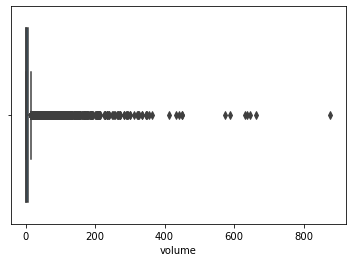

In [193]:
sns.boxplot(train_report['volume'])

In [194]:
iqr=train_report['volume'].describe()['75%']-train_report['volume'].describe()['25%']

In [195]:
iqr

6.0

In [196]:
train_report.groupby('outage_duration')['volume'].describe()

,count,mean,std,min,25%,50%,75%,max
outage_duration,,,,,,,,
0,12446.0,11.293749,29.905124,1.0,1.0,3.0,8.0,877.0
1,4494.0,4.302181,13.767647,1.0,1.0,2.0,3.0,434.0
2,2055.0,15.145985,31.279889,1.0,2.0,6.0,16.0,588.0


In [197]:
train_report['log_report_type'].value_counts()

log_report_type_312    1739
log_report_type_232    1556
log_report_type_82     1088
log_report_type_203     874
log_report_type_313     724
                       ... 
log_report_type_165       1
log_report_type_180       1
log_report_type_175       1
log_report_type_192       1
log_report_type_21        1
Name: log_report_type, Length: 310, dtype: int64

In [198]:
pd.crosstab(train_report['log_report_type'],train_report['outage_duration'])

outage_duration,0,1,2
log_report_type,,,
log_report_type_1,2,4,2
log_report_type_10,8,0,0
log_report_type_101,10,1,0
log_report_type_103,8,3,2
log_report_type_104,2,0,0
...,...,...,...
log_report_type_94,33,20,0
log_report_type_95,9,6,0
log_report_type_96,1,0,0


In [199]:
train_report[(train_report['outage_duration']==1) | (train_report['outage_duration']==2)]['log_report_type'].value_counts().head()

log_report_type_82     723
log_report_type_203    683
log_report_type_170    323
log_report_type_54     297
log_report_type_71     252
Name: log_report_type, dtype: int64

In [200]:
train_report_outage=pd.merge(train_report,outage_data)

In [201]:
train_report_outage

,id,area_code,outage_duration,log_report_type,volume,outage_type
0,13366,area_415,1,log_report_type_312,1,outage_type_4
1,6783,area_474,0,log_report_type_312,2,outage_type_2
2,6783,area_474,0,log_report_type_233,1,outage_type_2
3,6783,area_474,0,log_report_type_232,1,outage_type_2
4,6783,area_474,0,log_report_type_315,2,outage_type_2
...,...,...,...,...,...,...
18990,10675,area_798,2,log_report_type_82,25,outage_type_2
18991,14714,area_210,0,log_report_type_232,2,outage_type_2
18992,14714,area_210,0,log_report_type_312,3,outage_type_2
18993,6253,area_1007,0,log_report_type_201,6,outage_type_2


In [202]:
pd.crosstab(train_report_outage['log_report_type'],train_report_outage['outage_type'],margins=True)['outage_type_1'].sort_values()

log_report_type
log_report_type_175       0
log_report_type_40        0
log_report_type_28        0
log_report_type_302       0
log_report_type_130       0
                       ... 
log_report_type_203     421
log_report_type_134     426
log_report_type_170     438
log_report_type_82      503
All                    8526
Name: outage_type_1, Length: 311, dtype: int64

In [203]:
dataset.head()

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type,log_report_type,volume
0,13366,area_415,1,broadband_type_2,transit_server_type_35,outage_type_4,log_report_type_312,1
1,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,2
2,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_233,1
3,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_232,1
4,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_315,2


# Chi squared test

In [204]:
from scipy.stats import chi2_contingency
def chi_sqrd(col1,alpha):
    df_chisqrd=pd.crosstab(dataset[col1],dataset['outage_duration'])
    observed_values=df_chisqrd.values
    chi_cal,p_cal,dof,expected_values=chi2_contingency(observed_values)
    print(chi_cal,p_cal,dof,expected_values)
    if(p_cal > alpha):
        print('Accept the null hypothesis')
        print(f'{col1} has no relation with outage_duration')
    else:
        print('Reject the Null hypothesis')
        print(f'{col1} has relation with outage_duration')
    

In [205]:
chi_sqrd('broadband_type',0.05)

7149.525217036986 0.0 18 [[  288.23856002   125.83611378    66.9253262 ]
 [  227.11520634    99.15153248    52.73326118]
 [15025.55853225  6559.69795602  3488.74351173]
 [  336.17844527   146.76519715    78.05635758]
 [  880.29614277   384.31029343   204.3935638 ]
 [   65.91734221    28.77748964    15.30516815]
 [ 1221.26857656   533.16839891   283.56302452]
 [ 1340.5190411    585.2294938    311.25146509]
 [ 9576.59132583  4180.84601719  2223.56265697]
 [  385.31682764   168.21750761    89.46566475]]
Reject the Null hypothesis
broadband_type has relation with outage_duration


In [206]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48973 entries, 0 to 48972
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   48973 non-null  int64 
 1   area_code            48973 non-null  object
 2   outage_duration      48973 non-null  int64 
 3   broadband_type       48973 non-null  object
 4   transit_server_type  48973 non-null  object
 5   outage_type          48973 non-null  object
 6   log_report_type      48973 non-null  object
 7   volume               48973 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.4+ MB


In [207]:
from scipy.stats import chi2_contingency

def find_chi2_independence(cat_attr, target, data, alpha=0.05):
       
    print(f"---------------{target} Vs {cat_attr} Chi Square Test of Independence -------------------")
    print(f"Null Hypothesis: {target} and {cat_attr} has no relationship")
    print(f"Alternate Hypothesis : {target} and {cat_attr} has significant relationship")

#     print(f"\n Contingency table :\n")
#     print(tab)
    observed_values = pd.crosstab(data[target],data[cat_attr]).values
    stat, p, dof, expected = chi2_contingency(observed_values)
#     print(p)
#     print(f"\n Expected table :\n")
#     print(expected)
    
#     print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (Accept Null Hypothesis H0)') 

## We have to find for only categorical values, to make that automatically see below code

In [208]:
cat_col=[]

In [209]:
#This can be used to filter by dtypes
dataset.select_dtypes('int').columns

Index(['id', 'outage_duration', 'volume'], dtype='object')

In [210]:
for col in dataset.columns:
    if (dataset[col].nunique()) <10 or dataset[col].dtype=='object':
        cat_col.append(col)

In [211]:
target='outage_duration'
for col in cat_col:
    if col != target:
        find_chi2_independence(col, target, dataset, alpha=0.05)
        

---------------outage_duration Vs area_code Chi Square Test of Independence -------------------
Null Hypothesis: outage_duration and area_code has no relationship
Alternate Hypothesis : outage_duration and area_code has significant relationship
significance(alpha) = 0.050
Dependent (reject H0)
---------------outage_duration Vs broadband_type Chi Square Test of Independence -------------------
Null Hypothesis: outage_duration and broadband_type has no relationship
Alternate Hypothesis : outage_duration and broadband_type has significant relationship
significance(alpha) = 0.050
Dependent (reject H0)
---------------outage_duration Vs transit_server_type Chi Square Test of Independence -------------------
Null Hypothesis: outage_duration and transit_server_type has no relationship
Alternate Hypothesis : outage_duration and transit_server_type has significant relationship
significance(alpha) = 0.050
Dependent (reject H0)
---------------outage_duration Vs outage_type Chi Square Test of Indep

## Observations

+ By this we can conclude that all the categorical columns are dependant on each other

# Saving the dataset as CSV file

In [215]:
dataset.to_csv('PROJECT_merged_data.csv',index=False)

# Checking for High cardinality

In [216]:
for each_col in dataset.columns:
    if dataset[each_col].dtype=='object':
        print(f"{each_col} has {dataset[each_col].nunique()} categories")

area_code has 876 categories
broadband_type has 10 categories
transit_server_type has 49 categories
outage_type has 5 categories
log_report_type has 310 categories


### We are taking the probability of each category in a feature

In [217]:
area_code_freq=dict(dataset['area_code'].value_counts()/len(dataset))

In [218]:
dataset['area_code'].replace(area_code_freq,inplace=True)

In [219]:
dataset

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type,log_report_type,volume
0,13366,0.000674,1,broadband_type_2,transit_server_type_35,outage_type_4,log_report_type_312,1
1,6783,0.002205,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,2
2,6783,0.002205,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_233,1
3,6783,0.002205,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_232,1
4,6783,0.002205,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_315,2
...,...,...,...,...,...,...,...,...
48968,14714,0.000245,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,3
48969,14714,0.000245,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_232,2
48970,14714,0.000245,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_312,3
48971,6253,0.001103,0,broadband_type_8,transit_server_type_15,outage_type_2,log_report_type_201,6


In [238]:
log_report_dict=dict(dataset['log_report_type'].value_counts()[11:])

In [239]:
log_report_dict

{'log_report_type_219': 1129,
 'log_report_type_306': 1120,
 'log_report_type_71': 1105,
 'log_report_type_273': 1057,
 'log_report_type_315': 1003,
 'log_report_type_235': 874,
 'log_report_type_193': 870,
 'log_report_type_80': 845,
 'log_report_type_227': 763,
 'log_report_type_345': 754,
 'log_report_type_314': 665,
 'log_report_type_234': 629,
 'log_report_type_201': 628,
 'log_report_type_301': 608,
 'log_report_type_309': 453,
 'log_report_type_368': 422,
 'log_report_type_376': 420,
 'log_report_type_222': 412,
 'log_report_type_229': 410,
 'log_report_type_283': 392,
 'log_report_type_55': 389,
 'log_report_type_291': 378,
 'log_report_type_75': 367,
 'log_report_type_160': 347,
 'log_report_type_179': 338,
 'log_report_type_163': 336,
 'log_report_type_223': 328,
 'log_report_type_375': 320,
 'log_report_type_308': 314,
 'log_report_type_44': 304,
 'log_report_type_171': 294,
 'log_report_type_228': 292,
 'log_report_type_73': 291,
 'log_report_type_47': 286,
 'log_report_typ

In [249]:
others_dict={}.fromkeys(log_report_dict,'others')

In [250]:
others_dict

{'log_report_type_219': 'others',
 'log_report_type_306': 'others',
 'log_report_type_71': 'others',
 'log_report_type_273': 'others',
 'log_report_type_315': 'others',
 'log_report_type_235': 'others',
 'log_report_type_193': 'others',
 'log_report_type_80': 'others',
 'log_report_type_227': 'others',
 'log_report_type_345': 'others',
 'log_report_type_314': 'others',
 'log_report_type_234': 'others',
 'log_report_type_201': 'others',
 'log_report_type_301': 'others',
 'log_report_type_309': 'others',
 'log_report_type_368': 'others',
 'log_report_type_376': 'others',
 'log_report_type_222': 'others',
 'log_report_type_229': 'others',
 'log_report_type_283': 'others',
 'log_report_type_55': 'others',
 'log_report_type_291': 'others',
 'log_report_type_75': 'others',
 'log_report_type_160': 'others',
 'log_report_type_179': 'others',
 'log_report_type_163': 'others',
 'log_report_type_223': 'others',
 'log_report_type_375': 'others',
 'log_report_type_308': 'others',
 'log_report_type_

In [251]:
dataset['log_report_type'].replace(others_dict,inplace=True)

In [255]:
dataset['log_report_type'].value_counts()

others                 29117
log_report_type_312     3645
log_report_type_232     3379
log_report_type_82      1866
log_report_type_134     1543
log_report_type_203     1510
log_report_type_313     1466
log_report_type_54      1343
log_report_type_233     1337
log_report_type_68      1326
log_report_type_170     1233
log_report_type_307     1208
Name: log_report_type, dtype: int64